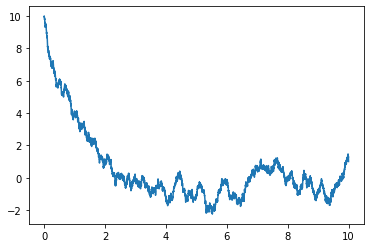

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Part 1

def run(x0=10,dt=0.001,seed=None,nsteps=10000):
    if seed is not None:
        np.random.seed(seed)
    x = x0
    traj = []
    for istep in range(nsteps):
        x += -x*dt + np.sqrt(2*dt)*np.random.normal()
        traj.append((istep*dt,x))
    return np.array(traj,dtype="float")

traj = run()
plt.plot(traj[:,0],traj[:,1])
plt.xlabel("time")
plt.ylabel("x")
plt.show()  

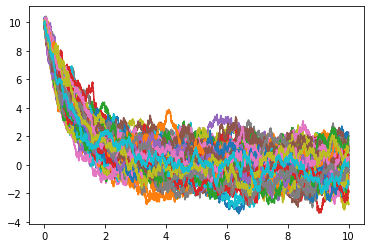

In [18]:
# Part 2

traj = []
for itraj in range(100):
    traj.append(run(seed=1977+itraj))
    
traj = np.array(traj)
traj.shape  # dimensions of traj

for itraj in range(len(traj)):
    plt.plot(traj[itraj,:,0],traj[itraj,:,1])
    
# for different x0, if the seed is the same, once they cross each other
# they become the same for subsequent time
# The likelyhood of their encounter is bigger, the lower the number
# of dimensions

In [ ]:
# For maximum independence, it's better to generate random numbers
# from the same seed, or consecutive ones, but it can't be done for
# parallel simulations
# Then the best is to use parallel number generators

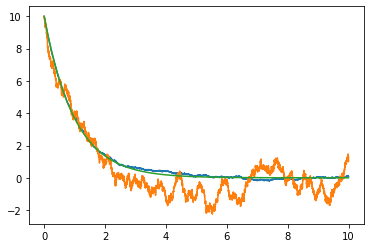

In [19]:
plt.plot(traj[0,:,0],np.average(traj[:,:,1],axis=0)) # average
plt.plot(traj[0,:,0],traj[0,:,1])  # single traj
plt.plot(traj[0,:,0],10*np.exp(-traj[0,:,0])) 

# the mean is exponential, because it's given by the deterministic part
# and it fluctuates as sigma/sqrt(n), n = # of traj
# for n to infty, the mean ~ x0*exp(-t)

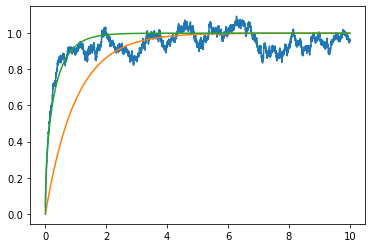

In [22]:
plt.plot(traj[0,:,0],np.std(traj[:,:,1],axis=0))
plt.plot(traj[0,:,0],1-np.exp(-traj[0,:,0]))
plt.plot(traj[0,:,0],np.sqrt(1-np.exp(-2*traj[0,:,0])))

# this is the behaviour for the standard deviation. The equation for V
# from Ito rule is dV = -2(V-1)dt, where V is the mean of the square
# V = A*exp(-2t) + 1 with V(0) = A+1, so A = x0^2-1
# Then std = sqrt(V-(x0*exp(-t))^2) and we obtain 
# std = sqrt(1-exp(-2t)), so not an exponential

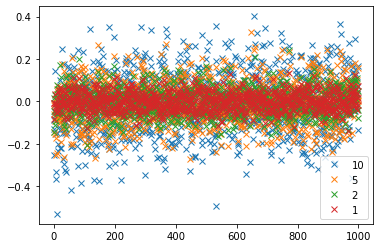

In [24]:
# Part 3

for n in (10,5,2,1):
    plt.plot((traj[0,n:,1] - traj[0,:-n,1])[::10],"x",label=str(n))
plt.legend()

# it clearly grows with tau (=n)

In [26]:
for n in (1,2,5,10,50,100):
    print(n,np.std((traj[0,n:,1] - traj[0,:-n,1]))/np.sqrt(n))
    
# so the std grows as sqrt(n)
# it is valid only for small n (for x0 small) because the stoch term
# dominates, while it decreases for big n (the deterministic term 
# becomes more important)

1 0.04422453044587518
2 0.043998856371273036
5 0.04436343451204629
10 0.04490965677325098
50 0.046610859270752286
100 0.04951465529344175


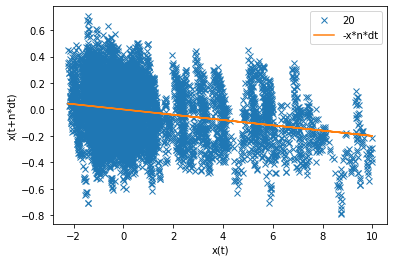

In [34]:
n = 20

plt.plot(traj[0,:-n,1],(traj[0,n:,1]-traj[0,:-n,1]),"x",label=str(n))
plt.xlabel("x(t)")
plt.ylabel("x(t+n*dt)")
plt.plot(traj[0,:-n,1],-traj[0,:-n,1]*n*0.001,label="-x*n*dt")
plt.legend()